In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns

#import sklearn to use linear regression algorithm to build model
from sklearn.linear_model import LinearRegression

#import sklearn to use decision tree regression algorithm to build model
from sklearn.tree import DecisionTreeRegressor

#Import Random Forest
from sklearn.ensemble import RandomForestRegressor

#Import Support Vector Machine
from sklearn import svm

#Import KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

#Import ANN
from sklearn.neural_network import MLPRegressor

#Import Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#import sklearn to split dataset into train/test datasets
from sklearn.model_selection import train_test_split

#import sklearn to perform k-fold cross validation and evaluation of model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

from matplotlib.offsetbox import AnchoredText

import pickle

In [2]:
computer = 'sph0088'
training = 'Set 1'

file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set.csv'.format(computer)
df = pd.read_csv(file)
df = df[df['tceq_pm25']>=0]
df = df[(df['pm2_5_atm_avg'] < df['pm10_0_atm_avg'])] #filter out abnormal values
df = df[(df['pm1_0_atm_avg'] < (df['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df['p03_p05'] = df['p_0_3_um_avg'] / df['p_0_5_um_avg']
df = df[(df['p03_p05'] < 3.75)] #filter out abnormal values

In [3]:
model_type = 'MLR'

model_formula = LinearRegression()

In [4]:
p_size = 0.8
threshold = 0.88
figsize=(9,7)

## Variable Importance On Best-Performing Model

In [5]:
%%time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#####################################################################################################

df_dust_set1 = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
df_nodust_set1 = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

################################### Slice Datasets ##########################################################
#################################### Training Set ##############################################################

x_set1 = df_dust_set1[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

y_set1 = df_dust_set1['tceq_pm25']

x_nd_set1 = df_nodust_set1[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

y_nd_set1 = df_nodust_set1['tceq_pm25']

############################### Train & Save Models #################################################


Wall time: 3.99 ms


Source: https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [6]:
trained_model_set1 = model_formula.fit(x_set1, y_set1)

coefs_dust_set1 = pd.DataFrame(trained_model_set1.coef_, x_set1.columns)
coefs_dust_set1.columns = ['Coefficients']
coefs_dust_set1

x_std_set1 = x_set1.std()
x_std_set1 = pd.DataFrame(x_std_set1)
x_std_set1.columns = ['Coefficients']

ns1 = x_std_set1 * coefs_dust_set1

In [7]:
trained_model_nd_set1 = model_formula.fit(x_nd_set1, y_nd_set1)


coefs_nodust_set1 = pd.DataFrame(trained_model_nd_set1.coef_, x_nd_set1.columns)
coefs_nodust_set1.columns = ['Coefficients']


x_nd_std_set1 = x_nd_set1.std()
x_nd_std_set1 = pd.DataFrame(x_nd_std_set1)
x_nd_std_set1.columns = ['Coefficients']

ns1_nd = x_nd_std_set1 * coefs_nodust_set1 

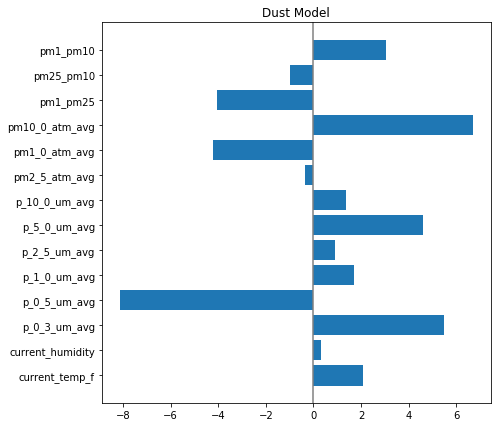

In [8]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.barh(ns1.index, ns1['Coefficients'])#, height=0.9)
ax.set_title('Dust Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

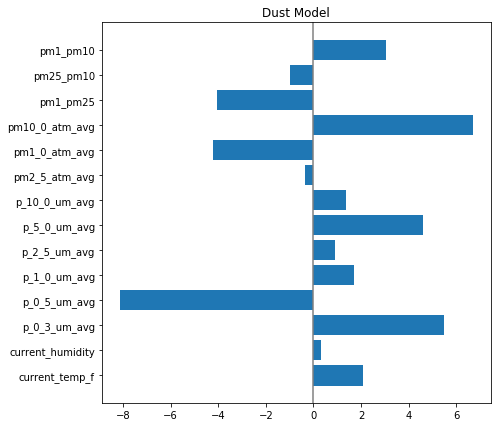

In [9]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.barh(ns1.index, ns1['Coefficients'])#, height=0.9)
ax.set_title('Dust Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

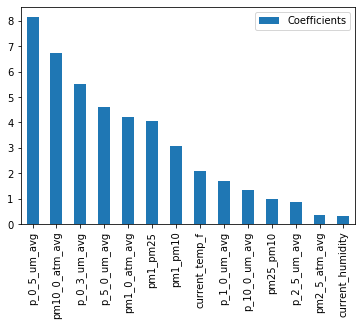

In [10]:
ns1.sort_values(by=['Coefficients'], ascending=False)
ns1_abs = abs(ns1).sort_values(by='Coefficients',ascending=False)
ns1_abs.plot(kind='bar')

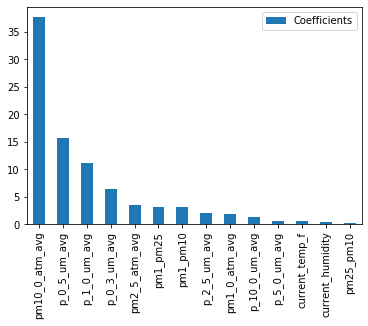

In [11]:
ns1_nd.sort_values(by=['Coefficients'], ascending=False)
ns1_abs_nd = abs(ns1_nd).sort_values(by='Coefficients',ascending=False)
ns1_abs_nd.plot(kind='bar')

In [49]:
print(coefs_dust_set1.sort_values(by='Coefficients',ascending=True))
print(coefs_nodust_set1.sort_values(by='Coefficients',ascending=False))

                  Coefficients
pm1_pm25             -7.569165
pm25_pm10            -5.416803
pm1_0_atm_avg        -0.813605
pm2_5_atm_avg        -0.057899
p_0_5_um_avg         -0.037708
p_0_3_um_avg          0.007454
current_humidity      0.019257
p_1_0_um_avg          0.037782
p_2_5_um_avg          0.138795
current_temp_f        0.181702
pm10_0_atm_avg        0.844249
p_10_0_um_avg         0.886380
p_5_0_um_avg          1.905318
pm1_pm10             14.180154
                  Coefficients
pm1_pm25             59.646091
pm25_pm10            10.822720
p_10_0_um_avg         7.594833
p_2_5_um_avg          1.035103
p_5_0_um_avg          0.912243
pm2_5_atm_avg         0.548271
pm1_0_atm_avg         0.418712
p_1_0_um_avg          0.268545
p_0_5_um_avg          0.071107
current_temp_f        0.038442
p_0_3_um_avg          0.008684
current_humidity     -0.019743
pm10_0_atm_avg       -5.653701
pm1_pm10            -57.825531


In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = x_set1
y = y_set1

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tceq_pm25   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     386.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:39:42   Log-Likelihood:                -2383.6
No. Observations:                 864   AIC:                             4797.
Df Residuals:                     849   BIC:                             4869.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.6781      2.727  

In [46]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = x_nd_set1
y = y_nd_set1

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tceq_pm25   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     141.7
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          3.49e-279
Time:                        15:41:44   Log-Likelihood:                -4415.8
No. Observations:                1843   AIC:                             8862.
Df Residuals:                    1828   BIC:                             8944.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -20.7984     48.157  

In [14]:
X = x_set1
y = y_set1


lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

# newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       -10.6781            2.727    -3.916          0.000
1         0.1817            0.024     7.510          0.000
2         0.0193            0.016     1.191          0.234
3         0.0075            0.011     0.675          0.500
4        -0.0377            0.041    -0.920          0.358
5         0.0378            0.039     0.970          0.332
6         0.1388            0.290     0.478          0.633
7         1.9053            0.619     3.076          0.002
8         0.8864            1.030     0.861          0.390
9        -0.0579            0.289    -0.200          0.841
10       -0.8136            0.249    -3.265          0.001
11        0.8442            0.417     2.023          0.043
12       -7.5692            1.073    -7.055          0.000
13       -5.4168            2.134    -2.538          0.011
14       14.1802            2.231     6.355          0.000


In [47]:
X_nd = x_nd_set1
y_nd = y_nd_set1


lm = LinearRegression()
lm.fit(X_nd,y_nd)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_nd)

# newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X_nd),1)), X_nd, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       -20.7984           48.157    -0.432          0.666
1         0.0384            0.009     4.151          0.000
2        -0.0197            0.006    -3.130          0.002
3         0.0087            0.006     1.525          0.127
4         0.0711            0.022     3.228          0.001
5         0.2685            0.039     6.867          0.000
6         1.0351            0.361     2.871          0.004
7         0.9122            0.607     1.503          0.133
8         7.5948            0.949     8.003          0.000
9         0.5483            0.740     0.741          0.459
10        0.4187            0.642     0.652          0.514
11       -5.6537            0.706    -8.009          0.000
12       59.6461           64.157     0.930          0.353
13       10.8227           52.041     0.208          0.835
14      -57.8255           69.461    -0.832          0.405


# Make Dust and No Dust Formula from Coefficients - Finished

# View Formula on dataset 2, 3, and 4